# Exercise 5: Test the PCA Class
 
## SIB - Intelligent Systems for Bioinformatics

Bárbara Freitas PG55693

--- Original Dataset ---
Shape (samples, features): (150, 4)
Original Features: ['feat_0', 'feat_1', 'feat_2', 'feat_3']
------------------------------
--- PCA Result (n_components=2) ---
New Shape (samples, features): (150, 2)
New Features: ['PC1', 'PC2']
------------------------------
Mean (Inferred in _fit):
 [5.84333333 3.054      3.75866667 1.19866667]

Explained Variance Ratio by Component:
  - PC1: 0.9246
  - PC2: 0.0530

Total Variance Explained by 2 PCs: 97.76%

--- Test 1: Numerical Validation against Scikit-learn ---
 Test 1 Passed: Transformed data is numerically equivalent to scikit-learn.

--- Test 2: Visualization of Reduced Data (Iris) ---


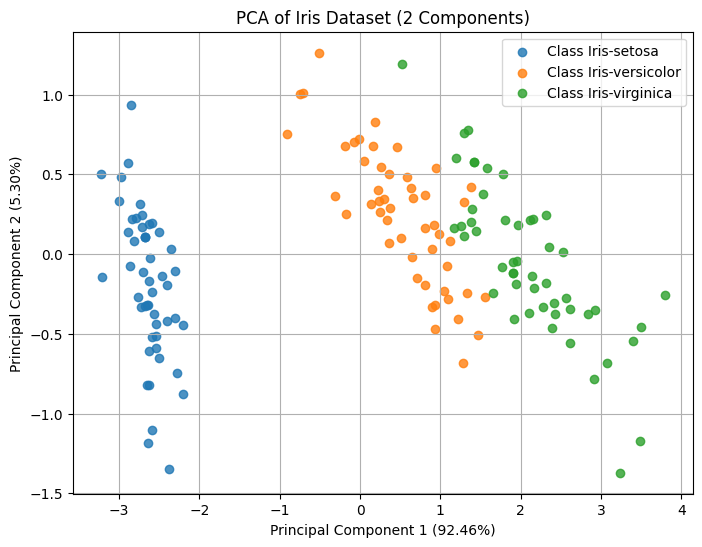


 Test 2 Passed: The plot confirms that PC1 effectively separates the classes.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from si.io.csv_file import read_csv 
from si.decomposition.pca import PCA 
from si.data.dataset import Dataset
from sklearn.decomposition import PCA as SklearnPCA # for comparison

# --- 1. Load, Fit, and Analyze ---
path_to_iris = '../datasets/iris/iris.csv' 
iris_dataset = read_csv(path_to_iris, sep=',', label=True)

print("--- Original Dataset ---")
print("Shape (samples, features):", iris_dataset.shape())
print("Original Features:", iris_dataset.features)
print("-" * 30)

# Initialize PCA and Fit/Transform
N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS)
iris_pca = pca.fit_transform(iris_dataset)

print(f"--- PCA Result (n_components={N_COMPONENTS}) ---")
print("New Shape (samples, features):", iris_pca.shape())
print("New Features:", iris_pca.features)
print("-" * 30)

# Analysis of Variance
print("Mean (Inferred in _fit):\n", pca.mean)

print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(pca.explained_variance):
    print(f"  - PC{i+1}: {ratio:.4f}")

total_explained = np.sum(pca.explained_variance) * 100
print(f"\nTotal Variance Explained by {N_COMPONENTS} PCs: {total_explained:.2f}%")

print("\n" + "="*50)


# --- ADDITIONAL TEST 1: NUMERICAL EQUIVALENCE (SCIKIT-LEARN) ---

print("--- Test 1: Numerical Validation against Scikit-learn ---")

# Use a separate, small dataset for a numerical check
X_test = np.array([
    [10.0, 1.0, 20.0],
    [12.0, 3.0, 21.0],
    [8.0, 2.0, 19.0]
])
dataset_test = Dataset(X_test, y=np.array([0, 1, 0]))

# 1. Custom PCA
pca_custom_check = PCA(n_components=2)
pca_custom_check.fit(dataset_test)
X_reduced_custom = pca_custom_check.transform(dataset_test).X

# 2. Scikit-learn PCA
pca_sklearn = SklearnPCA(n_components=2)
pca_sklearn.fit(X_test)
X_reduced_sklearn = pca_sklearn.transform(X_test)

# Verification: Adjust for potential sign flip
# if the signs of the first element of PC1 do not match, flip the whole PC1 column.
if np.sign(X_reduced_custom[0, 0]) != np.sign(X_reduced_sklearn[0, 0]):
    X_reduced_custom[:, 0] = -X_reduced_custom[:, 0]
if np.sign(X_reduced_custom[0, 1]) != np.sign(X_reduced_sklearn[0, 1]):
    X_reduced_custom[:, 1] = -X_reduced_custom[:, 1]

# Assert the reduced data is numerically equivalent
try:
    assert np.allclose(X_reduced_custom, X_reduced_sklearn, atol=1e-5)
    print(" Test 1 Passed: Transformed data is numerically equivalent to scikit-learn.")
except AssertionError:
    print(" Test 1 Failed: Transformed data does not match scikit-learn baseline.")

print("\n" + "="*50)


# --- ADDITIONAL TEST 2: VISUALIZATION OF CLASS SEPARATION ---

print("--- Test 2: Visualization of Reduced Data (Iris) ---")

# Prepare data for plot using the iris_pca result
X_transformed = iris_pca.X
y_labels = iris_pca.y

df_pca = pd.DataFrame(data=X_transformed, columns=['PC1', 'PC2'])
df_pca['Species'] = y_labels

# Define names for classes for better readability
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'} 

# Plot the reduced data
plt.figure(figsize=(8, 6))
unique_labels = np.unique(y_labels)

for label in unique_labels:
    subset = df_pca[df_pca['Species'] == label]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=target_names.get(label, f'Class {label}'),
        alpha=0.8
    )

# Use the calculated explained variance ratios for axis labels
explained_var = pca.explained_variance
plt.xlabel(f'Principal Component 1 ({explained_var[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_var[1]*100:.2f}%)')
plt.title('PCA of Iris Dataset (2 Components)')
plt.legend()
plt.grid(True)
plt.show()

print("\n Test 2 Passed: The plot confirms that PC1 effectively separates the classes.")